# Analyse Énergétique - Notebook

## 1. Import des bibliothèques et du code

In [28]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ajout du dossier src au path
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

# Imports du projet
from processing.data_processing import load_data
from processing.statistics_ import save_statistics
from visualization.visualization import plot_data, plot_data_interactive


In [ ]:


def find_project_root():
    current_dir = os.getcwd()
    print(f"Dossier de travail courant: {current_dir}")
    while not any(folder in os.listdir(current_dir) for folder in ['data', 'src']):
        parent_dir = os.path.dirname(current_dir)
        if parent_dir == current_dir:
            print("Racine du projet non trouvée, du coup ça reste dans le notebook.")
            break
        current_dir = parent_dir
    print(f"Racine projet détectée: {current_dir}")
    return current_dir


In [37]:
find_project_root()

Dossier de travail courant: c:\Users\User\Documents\PYTHON\AnalyseEnergie\notebooks
Racine projet détectée: c:\Users\User\Documents\PYTHON\AnalyseEnergie


'c:\\Users\\User\\Documents\\PYTHON\\AnalyseEnergie'

## 2. Chargement des données

In [30]:
df = load_data("../data/energy_data.csv")
df.head()


,date,index,price_per_kwh,devices,temps,consumption_kwh,cost
0,2024-12-06,8000,0.12,Fridge,soleil,0.0,0.00
1,2024-12-07,8100,0.12,"Fridge, Oven",pluie,100.0,12.00
2,2024-12-08,8300,0.11,"Fridge, TV",mitigé,200.0,22.00
3,2024-12-09,7800,0.12,"Fridge, Oven, Dryer",soleil,-500.0,-60.00
4,2024-12-10,7648,0.09,"Fridge, Dryer",mitigé,-152.0,-13.68


## 3. Statistiques descriptives

In [31]:
df.describe()

,date,index,price_per_kwh,consumption_kwh,cost
count,46,46.000000,46.000000,46.000000,46.000000
mean,2024-12-28 12:00:00,10061.260870,0.113696,113.695652,12.843478
min,2024-12-06 00:00:00,7648.000000,0.090000,-500.000000,-60.000000
25%,2024-12-17 06:00:00,8337.500000,0.100000,100.000000,12.250000
50%,2024-12-28 12:00:00,9925.000000,0.115000,150.000000,16.500000
75%,2025-01-08 18:00:00,11595.000000,0.120000,150.000000,18.950000
max,2025-01-20 00:00:00,13230.000000,0.140000,500.000000,60.000000
std,NaN,1774.627165,0.013721,149.300572,17.249308


## 4. Appareils les plus utilisés

In [32]:
from collections import Counter

device_list = df["devices"].str.split(", ").sum()
device_counts = Counter(device_list)
pd.DataFrame(device_counts.most_common(), columns=["Appareil", "Occurrences"])


,Appareil,Occurrences
0,Fridge,46
1,Oven,21
2,TV,17
3,Dryer,17
4,PC,7


## 5. Visualisation statique avec Matplotlib

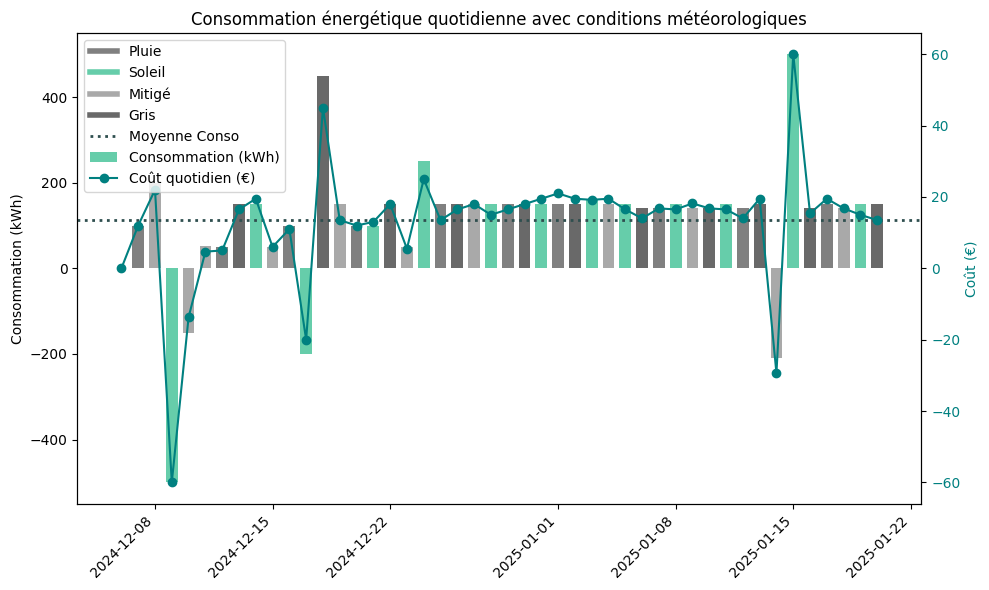

In [33]:
plot_data(df)

## 6. Visualisation interactive avec Plotly

In [34]:
plot_data_interactive(df)